# Weather Prediction Using ARIMA And SARIMA Models
**SUMIT | 19312 | DSE**


In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 38.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


## **Data Analysis and Cleaning**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('DSE_19312_Sumit_ProjectData.csv',index_col=0)
data.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [4]:
data.index = pd.to_datetime(data.index)
data = data[data['City']=='Delhi'].AverageTemperature

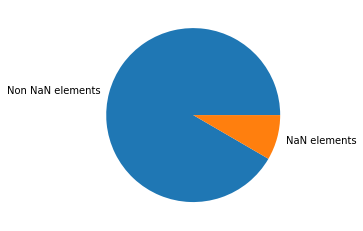

In [5]:
plt.pie(data.isna().value_counts(),startangle=0,labels=['Non NaN elements','NaN elements'])
plt.show()

In [6]:
data=data.fillna(method='bfill')

In [7]:
data1 = data.loc['1990-01-01':'2012-01-01']

In [8]:
data1

dt
1990-01-01    16.755
1990-02-01    17.690
1990-03-01    21.681
1990-04-01    28.983
1990-05-01    33.247
               ...  
2011-09-01    29.399
2011-10-01    26.849
2011-11-01    22.484
2011-12-01    16.203
2012-01-01    13.701
Name: AverageTemperature, Length: 265, dtype: float64

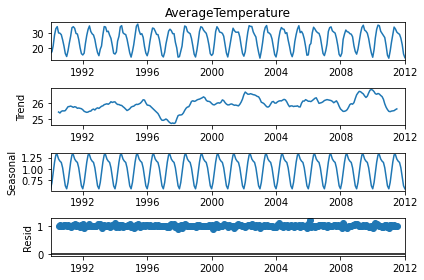

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data1, model='multiplicative')
fig = result.plot()

### **Dataset Used for Prediction**

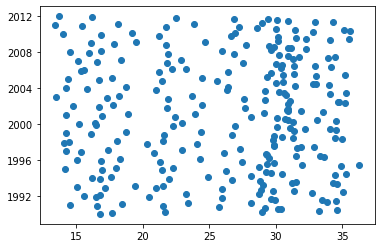

In [10]:
df =pd.DataFrame(data1)
plt.scatter(df,df.index)
plt.show()

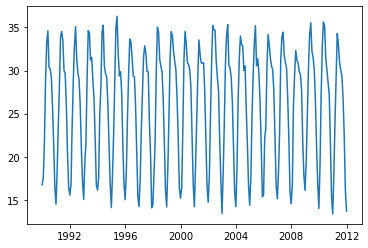

In [11]:
plt.plot(data1)
plt.show()

### **Check stationarity of Data**

In [12]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(data1.dropna().values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# p-value is significantly less than 0.5 -> we can reject null hypothesis -> stationary

ADF Statistic: -3.081940
p-value: 0.027919


In [13]:
from statsmodels.tsa.stattools import kpss
result = kpss(data1.dropna(), regression='c', nlags="auto")
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# p-value is less than 0.5 but close -> not perfectly stationary, might need to take difference.

KPSS Statistic: 0.017047
p-value: 0.100000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2016: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


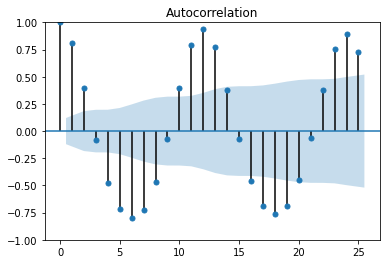

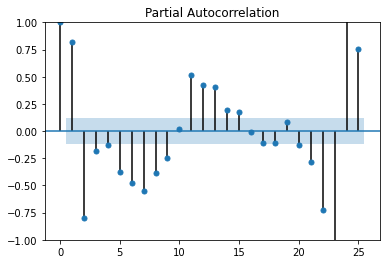

In [15]:
plot_acf(data1);
plot_pacf(data1);

### **Train Test Split**

In [16]:
train = data1.loc['1990-01-01':'2009-12-01']
test = data1.loc['2010-01-01':]

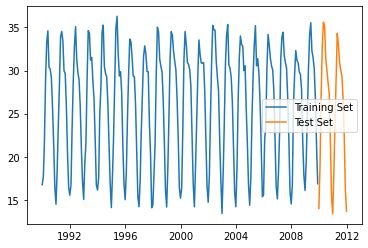

In [17]:
plt.plot(train,label='Training Set')
plt.plot(test,label='Test Set')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


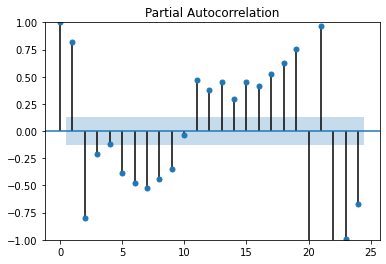

In [18]:
plot_pacf(train); #for finding AR term(p)

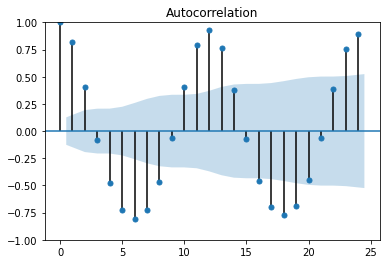

In [19]:
plot_acf(train); #for MA term(q) 

In [20]:
# d=0
# p can be taken as 2 or 3, q=2
# I will now compare 3 models with p=0, 1,or 2

## **ARIMA Models**

In [21]:
from statsmodels.tsa.arima.model import ARIMA

# 1,0,2 ARIMA Model
model1 = ARIMA(train, order=(1,0,2))
model_fit1 = model1.fit()
print(model_fit1.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                  240
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -569.077
Date:                Wed, 08 Dec 2021   AIC                           1148.155
Time:                        17:43:04   BIC                           1165.558
Sample:                    01-01-1990   HQIC                          1155.167
                         - 12-01-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.6787      1.122     22.890      0.000      23.480      27.877
ar.L1          0.6561      0.069      9.569      0.000       0.522       0.790
ma.L1          0.8104      0.071     11.481      0.0

In [22]:
from statsmodels.tsa.arima.model import ARIMA

# 2,0,2 ARIMA Model
model2 = ARIMA(train, order=(2,0,2))
model_fit2 = model2.fit()
print(model_fit2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                  240
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -495.568
Date:                Wed, 08 Dec 2021   AIC                           1003.135
Time:                        17:43:04   BIC                           1024.019
Sample:                    01-01-1990   HQIC                          1011.550
                         - 12-01-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8886      0.077    335.167      0.000      25.737      26.040
ar.L1          1.6644      0.023     71.543      0.000       1.619       1.710
ar.L2         -0.9390      0.024    -38.341      0.0

In [23]:
from statsmodels.tsa.arima.model import ARIMA

# 3,0,2 ARIMA Model
model3 = ARIMA(train, order=(3,0,2))
model_fit3 = model3.fit()
print(model_fit3.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting paramet

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                  240
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -498.825
Date:                Wed, 08 Dec 2021   AIC                           1011.650
Time:                        17:43:05   BIC                           1036.014
Sample:                    01-01-1990   HQIC                          1021.467
                         - 12-01-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8888      0.079    328.781      0.000      25.735      26.043
ar.L1          0.7950      0.079     10.035      0.000       0.640       0.950
ar.L2          0.5323      0.130      4.103      0.0

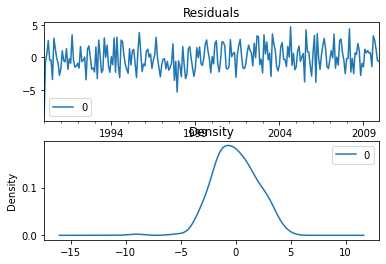

In [24]:
residuals = pd.DataFrame(model_fit2.resid)
fig, ax = plt.subplots(2,1)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

### **Forecast**

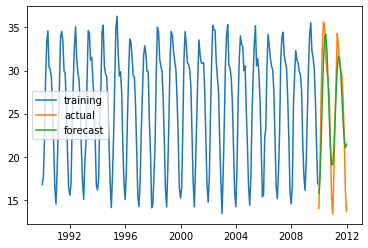

In [25]:
fc = model_fit2.forecast(25,alpha=0.05)

plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.legend()
plt.show()

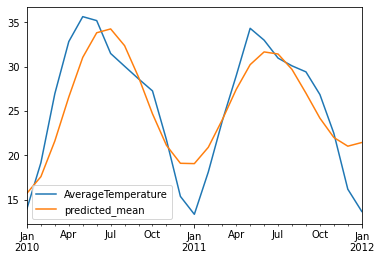

In [26]:
pd.concat([test,fc],axis=1).plot()
plt.show()

In [27]:
np.mean(test)

25.579920000000005

In [28]:
#calculate root mean sqaure error
from math import sqrt
from sklearn.metrics import mean_squared_error

rms1 = sqrt(mean_squared_error(test,fc))
print(rms1)

3.3908641561235044


In [29]:
# One way to find Accuracy is to subtract the rmse percentage from 100
acc1 = 100 - rms1*100/np.mean(test)
print('Accuracy: '+str(acc1))

Accuracy: 86.74403924592609


**Seasonal differencing**

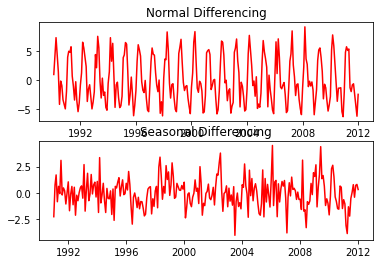

In [30]:
fig, ax = plt.subplots(2,1)
ax[0].plot(data1[:].diff(1), label='Usual Differencing',c='red')
ax[0].set_title('Normal Differencing')
ax[1].plot(data1[:].diff(12), label='Seasonal Differencing', c='red')
ax[1].set_title('Seasonal Differencing')
plt.show()

## **Model using Auto ARIMA (Sarimax)**

In [31]:
import pmdarima as pm
stepwise_model = pm.auto_arima(data1, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.73 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1020.024, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=865.356, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=758.451, Time=0.60 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=755.965, Time=0.74 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=818.127, Time=0.25 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=757.633, Time=1.67 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=755.388, Time=3.02 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=755.556, Time=1.45 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=757.140, Time=5.84 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=854.135, Time=1.43 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=7.92 sec
 ARIMA(0,1,2)(1,1,2)[12]             : AIC=inf, Time=3.60 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=812.8

In [32]:
stepwise_model.fit(train)
future_forecast = stepwise_model.predict(n_periods=25)
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])

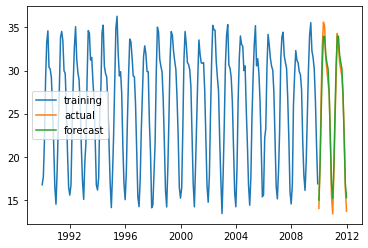

In [33]:
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(future_forecast, label='forecast')
plt.legend()
plt.show()

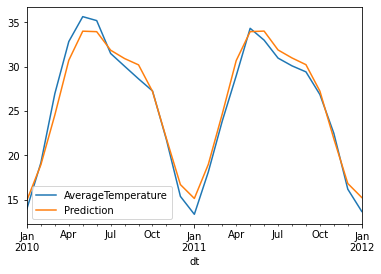

In [34]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()
plt.show()

In [35]:
#calculate rmse 
from math import sqrt
from sklearn.metrics import mean_squared_error

rms2 = sqrt(mean_squared_error(test,future_forecast))
print(rms2)

1.180210368677316


In [36]:
acc2 = 100-rms2*100/np.mean(test)
print('Accuracy: '+str(acc2))

Accuracy: 95.3861842856533
